# Scrubs: Understanding Success

Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula

#### Team Members Names:  Zachary Wieselthier, Laura Martin, Sean Worth, Ryan Nicholls


In [0]:
!pip install pystan

In [33]:
#Import Packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import shapiro #normallity test
from scipy.stats import mstats
from fbprophet import Prophet


#Import Data and Create Data Frame
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The shareable link
link = 'https://drive.google.com/open?id=1M5g5h3KGhemzTzqarN1weZqAUPAef224' 
fluff, id = link.split('=')

# Dataset is now stored in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Scrubs_pub.csv')  
sb = pd.read_csv('Scrubs_pub.csv')
sb.head(4)


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/discovery/v1/apis/drive/v2/rest
INFO:oauth2client.transport:Attempting refresh to obtain initial access_token
INFO:oauth2client.client:Refreshing access_token
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1M5g5h3KGhemzTzqarN1weZqAUPAef224?alt=json


,ID,Title,Director,Writer,Original Air Date,Rating,url,Turk:,Dr. Cox:,Dr. Kelso:,...,Lonnie:,Crispin:,Randall:,Roy:,Leonard:,Snoop Dogg Intern:,Sean:,Danni:,Gloria:,Lisa:
0,1_1,My First Day,Adam Bernstein,Bill Lawrence,10/2/2001,8.6,https://scrubs.fandom.com/wiki/My_First_Day_tr...,20,42,24,...,0,0,0,0,0,0,0,0,0,0
1,1_2,My Mentor,Adam Bernstein,Bill Lawrence,10/4/2001,8.2,https://scrubs.fandom.com/wiki/My_Mentor_trans...,27,44,8,...,0,0,0,0,0,0,0,0,0,0
2,1_3,My Best Friend's Mistake,Adam Bernstein,Eric Weinberg,10/9/2001,8.1,https://scrubs.fandom.com/wiki/My_Best_Friend%...,32,16,18,...,0,0,0,0,0,0,0,0,0,0
3,1_4,My Old Lady,Marc Buckland,Matt Tarses,10/16/2001,9.2,https://scrubs.fandom.com/wiki/My_Old_Lady_tra...,36,11,12,...,0,0,0,0,0,0,0,0,0,0


### Descriptive Statistics

In [34]:
#Calculate Mean
avg_rating = sb["Rating"].mean() 
#Calculate Median
med_rating =sb['Rating'].median() 
#Calculate total number of episodes
count_episodes = sb['ID'].count() 
from scipy.stats import shapiro
#Print Results
print 'Descriptive Statistics'
print'==================================='
print 'Average Episode Rating =', ("%.2f" % avg_rating)
print 'Median Episode Rating =',  med_rating
print 'Total number of Episodes =', count_episodes
print''
print 'Normality'
print'==================================='
stat, p = shapiro(sb['Rating'])
print 'p = ', p
if p<.05:
   print 'Failed Normality Test'


Descriptive Statistics
Average Episode Rating = 8.37
Median Episode Rating = 8.2
Total number of Episodes = 117

Normality
p =  3.88960597064e-09
Failed Normality Test


The average episode rating is an 8.37 and the median is a 8.2. 

Population size is 117 episodes.

The rating does not follow a normal distribution tested by the Shapiro Wilk test resulting in a P value of .000 which is less than the alpha value of .05. 

### Histogram

Text(0.5,0,u'Rating')

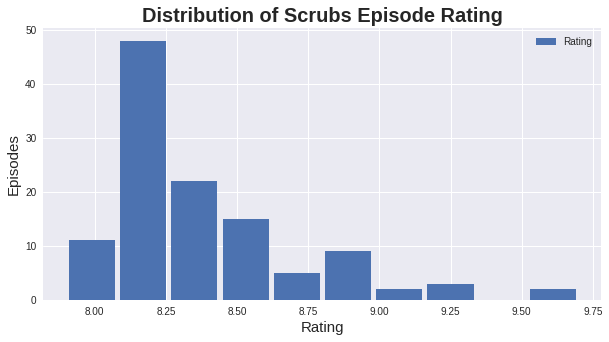

In [35]:
x = sb[['Rating']]

#Plotting graph
x.plot.hist(figsize=(10,5),grid=True, bins=10, rwidth=.9) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Distribution of Scrubs Episode Rating', fontsize=20, fontweight='bold')
plt.ylabel('Episodes', fontsize=15)
plt.xlabel('Rating', fontsize=15)

By plotting a histogram to visualize the distribution of ratings per episode, we can observe that the data is slightly right, and follows a non standard distribution. Most of the episode ratings fall between 8.2 and 8.5, while some ratings were as low as 7.9 and as high as 9.75. In descriptive statistics, the difference between the average and the median episode rating is another representation of normality. The difference is .17 which is very small, yet it is not normal.

In [36]:
#Defining Independent Variables
X = sb[['Turk:', 'Dr. Cox:', 'Dr. Kelso:', 'J.D.:', 'Elliot:', 'Janitor:',
        'Carla:', 'Todd:', 'Ted:', 'Nurse Roberts:', 'Jordan:', 'Doug:', 
        'Keith:', 'Dr. Wen:', 'Dr. Mickhead:', 'Lonnie:', 'Randall:', 'Sean:', 
        'Danni:','Gloria:', 'Lisa:']]   

X.sum()

Turk:             3625
Dr. Cox:          3489
Dr. Kelso:        1402
J.D.:             6543
Elliot:           3172
Janitor:          1201
Carla:            2840
Todd:              424
Ted:               174
Nurse Roberts:     240
Jordan:            703
Doug:              166
Keith:             119
Dr. Wen:            69
Dr. Mickhead:       13
Lonnie:             37
Randall:            19
Sean:              200
Danni:             142
Gloria:             11
Lisa:               43
dtype: int64

Lloyd was removed; he appeared 1 time and spoke 6 lines.

Crispin was removed; he appeared 2 times and spoke 1 line per appearance.

Roy was removed; he appeared 1 time and spoke 1 line.

Leonard was removed; he appeared 3 times and spoke 1 line per appearance.

Snoop Dogg Intern was removed; he appeared 1 time and spoke 1 line.

### Linear Regression - Character Lines

In [37]:
#Defining Dependent Variable
Y = sb['Rating']     

#Defining Independent Variables
X = sb[['Turk:', 'Dr. Cox:', 'Dr. Kelso:', 'J.D.:', 'Elliot:', 'Janitor:','Carla:', 'Todd:', 'Ted:', 'Nurse Roberts:', 
        'Jordan:', 'Doug:', 'Keith:', 'Dr. Wen:', 'Dr. Mickhead:', 'Lonnie:', 'Randall:', 'Sean:', 'Danni:', 'Gloria:', 'Lisa:']]   
           
#Adding the residual variable 
X = sm.add_constant(X)      

#Create and run the model 
model = sm.OLS(Y,X).fit()         
predictions = model.predict(X)      

#Print the regression model
print_model = model.summary()         
print (print_model)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.266
Date:                Thu, 27 Dec 2018   Prob (F-statistic):              0.218
Time:                        02:06:00   Log-Likelihood:                -25.941
No. Observations:                 117   AIC:                             95.88
Df Residuals:                      95   BIC:                             156.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.0831      0.311     29.

A linear regression was used to understand the correlation between a characters presence and the episode’s rating; the more lines a character speaks the more presence they have in an episode.The regression resulted not statistically significant with a P value of .218, suggesting that character presence does not have an impact on the rating of an episode. 

Moreover, the model’s low R^2 value of .219 means that only 22% of the variance can be explained from a characters speaking role. There are other factors that explain a majority of the variance in an episodes rating.The majority of individual characters do not have a statistically significant correlation on the episodes rating based on having P Values greater than alpha of .05. 

Although, one character named Elliot did result in being statistically significant with a P value of .041. Moreover, he had a negative corresponding coefficient of -.007. This evidence tells us that his presence causes a negative affect in episode ratings.

### 5 Visualization:


Text(0.5,1.02,u'Signigicant Characters Pair Plots for Scrubs')

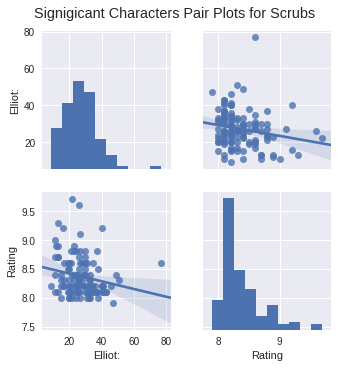

In [0]:
#In the regression table we found 1 characters with a statistical significance to the rating: Elliot.

#Elliot compared to rating
lines_Rating = sb[['Elliot:', 'Rating']]

#Regression visual on significant characters vs rating
sns.pairplot(lines_Rating, kind='reg') 

plt.suptitle('Signigicant Characters Pair Plots for Scrubs', y=1.02)

As we have stated before, in the regression table it was found that one character contributed a negative significance to the rating; Elliot. A pairplot was ran to visualize the slope of the regression line.

### Director Hypothesis Test

In [38]:

import numpy as np
from scipy.stats import mstats
AB = sb.loc[sb['Director'] == "Adam Bernstein"]
AB = AB['Rating'].values

BL = sb.loc[sb['Director'] == "Bill Lawrence"]
BL = BL['Rating'].values

CK = sb.loc[sb['Director'] == "Chris Koch"]
CK = CK['Rating'].values

CZ = sb.loc[sb['Director'] == "Craig Zisk"]
CZ = CZ['Rating'].values

KW = sb.loc[sb['Director'] == "Ken Whittingham"]
KW = KW['Rating'].values

LT = sb.loc[sb['Director'] == "Lawrence Trilling"]
LT = LT['Rating'].values

MB = sb.loc[sb['Director'] == "Marc Buckland"]
MB = MB['Rating'].values

MS = sb.loc[sb['Director'] == "Michael Spiller"]
MS = MS['Rating'].values


other = sb.loc[ (sb['Director'] != 'Adam Bernstein') & 
               (sb['Director'] != 'Bill Lawrence') & 
               (sb['Director'] != 'Chris Koch') & 
               (sb['Director'] != 'Craig Zisk') & 
               (sb['Director'] != 'Ken Whittingham') & 
               (sb['Director'] != 'Lawrence Trilling') & 
               (sb['Director'] != 'Marc Buckland') & 
               (sb['Director'] != 'Michael Spiller')]
other = other['Rating'].values
other


H, pval = mstats.kruskalwallis(AB, BL, CK, CZ, KW, LT, MB, MS, other)
print("Kruskal Wallis H-test test:")
print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05:
    print("Reject null hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Fail to reject null hypothesis")

Kruskal Wallis H-test test:
('H-statistic:', 5.478097689198803)
('P-Value:', 0.7054653607360197)
Fail to reject null hypothesis


The Kruskal Wallis test is the non parametric alternative to the One Way ANOVA. Non parametric means that the test does not assume your data comes from a particular distribution. The H test is used when the assumptions of normality for ANOVA are not met. It is sometimes called the "one-way ANOVA on ranks", as the ranks of the data’s values are used in the test rather than the actual data points.The test determines whether the medians of two or more groups are different. The test statistic used in this project is called the H statistic. The hypotheses for the test are: H0: population medians are equal and H1: population medians are not equal.
The Kruskal Wallis test will identify if there is a significant difference between multiple groups.

The groupings were made in excel on a pivot table. Directors who directed five times or less are grouped as “Other” and all others above five are in their own individual group.In this case we failed to reject the null hypothesis which means our groups are similar. The data suggests directors do have an impact on rating. 


In [0]:
MS

array([8. , 8.3, 8.9, 8.8, 8.1, 8.1, 8.1, 8.1, 8.1, 8. , 8.1, 9. , 8.2,
       8.3, 8.6])

### Writer Hypothesis Test

In [39]:
import numpy as np
from scipy.stats import mstats
AN = sb.loc[sb['Writer'] == "Angela Nissel"]
AN = AN['Rating'].values

BL = sb.loc[sb['Writer'] == "Bill Lawrence"]
BL = BL['Rating'].values

DF = sb.loc[sb['Writer'] == "Debra Fordham"]
DF = DF['Rating'].values

EW = sb.loc[sb['Writer'] == "Eric Weinberg"]
EW = EW['Rating'].values

GA = sb.loc[sb['Writer'] == "Gabrielle Allan"]
GA = GA['Rating'].values

JB = sb.loc[sb['Writer'] == "Janae Bakken"]
JB = JB['Rating'].values

MS = sb.loc[sb['Writer'] == "Mark Stegemann"]
MS = MS['Rating'].values

MT = sb.loc[sb['Writer'] == "Matt Tarses"]
MT = MT['Rating'].values

MZ = sb.loc[sb['Writer'] == "Mike Schwartz"]
MZ = MZ['Rating'].values

NGGD = sb.loc[sb['Writer'] == "Neil Goldman & Garrett Donovan"]
NGGD = NGGD['Rating'].values

TH = sb.loc[sb['Writer'] == "Tim Hobert"]
TH = TH['Rating'].values


other = sb.loc[ (sb['Writer'] != 'Angela Nissel') & 
               (sb['Writer'] != 'Bill Lawrence') & 
               (sb['Writer'] != 'Debra Fordham') & 
               (sb['Writer'] != 'Eric Weinberg') & 
               (sb['Writer'] != 'Gabrielle Allan') & 
               (sb['Writer'] != 'Janae Bakken') & 
               (sb['Writer'] != 'Mark Stegeman') & 
               (sb['Writer'] != 'Matt Tarses')& 
               (sb['Writer'] != 'Mike Schwartz') & 
               (sb['Writer'] != 'Neil Goldman & Garrett Donovan') & 
               (sb['Writer'] != 'Tim Hobert')]
other = other['Rating'].values
other


H, pval = mstats.kruskalwallis(AN, BL, DF, EW, GA, JB, MS, MT, MZ, NGGD, TH, other)
print("Kruskal Wallis H-test test:")
print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05:
    print("Reject null hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Fail to reject null hypothesis")

Kruskal Wallis H-test test:
('H-statistic:', 13.905647039713571)
('P-Value:', 0.23825846639501233)
Fail to reject null hypothesis


The Kruskal Wallis test is the non parametric alternative to the One Way ANOVA. Non parametric means that the test does not assume your data comes from a particular distribution. The H test is used when the assumptions of normality for ANOVA are not met. It is sometimes called the "one-way ANOVA on ranks", as the ranks of the data’s values are used in the test rather than the actual data points.The test determines whether the medians of two or more groups are different. The test statistic used in this project is called the H statistic. The hypotheses for the test are: H0: population medians are equal and H1: population medians are not equal.
The Kruskal Wallis test will identify if there is a significant difference between multiple groups.

The groupings were made in excel on a pivot table. Writers who wrote five times or less are grouped as “Other” and all others above five are in their own individual group.In this case we failed to reject the null hypothesis which means our groups are similar. The data suggests writers do have an impact on rating. 

### Box and Wisker Plot

Text(0.5,0,u'Character')

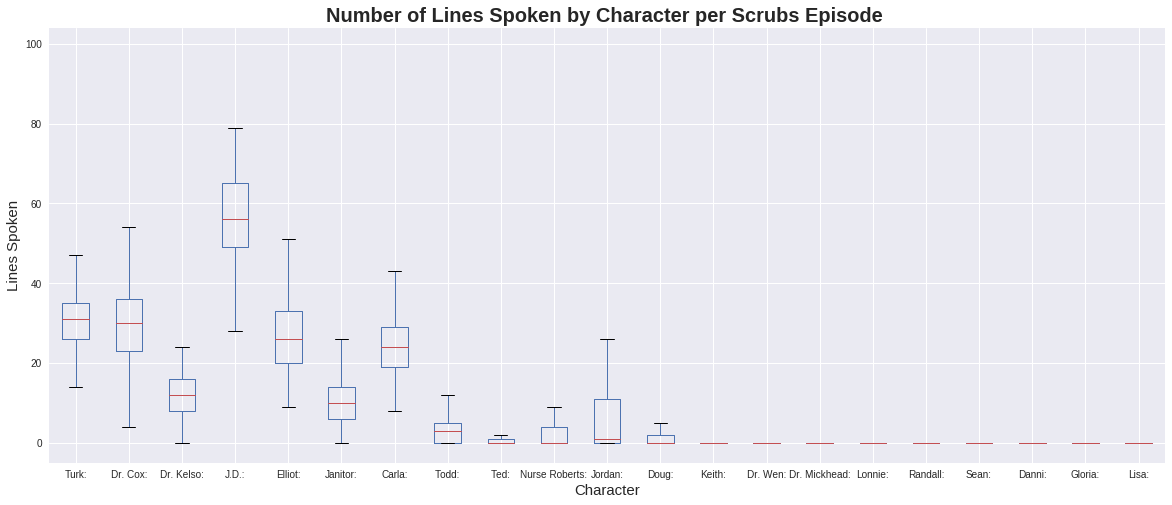

In [0]:
#Box Plot Number of lines spoken by each main character

lines = sb[['Turk:', 'Dr. Cox:', 'Dr. Kelso:', 'J.D.:', 'Elliot:', 'Janitor:','Carla:', 'Todd:', 'Ted:', 'Nurse Roberts:', 
        'Jordan:', 'Doug:', 'Keith:', 'Dr. Wen:', 'Dr. Mickhead:', 'Lonnie:', 'Randall:', 'Sean:', 'Danni:', 'Gloria:', 'Lisa:']]

#Plotting graph
lines.boxplot(figsize=(20,8)) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Number of Lines Spoken by Character per Scrubs Episode ',fontsize=20, fontweight='bold')
plt.ylabel('Lines Spoken', fontsize=15)
plt.xlabel('Character', fontsize=15) 

By using a boxplot to visualize the distribution of the number of lines spoken by each character per episode, we can see that the main characters, Turk, Dr.Cox, J.D., Elliot and Carla spoke more than 20 lines per episode. We can also observe that they had the largest distributions.

In [0]:
lines.sum()

Turk:             3625
Dr. Cox:          3489
Dr. Kelso:        1402
J.D.:             6543
Elliot:           3172
Janitor:          1201
Carla:            2840
Todd:              424
Ted:               174
Nurse Roberts:     240
Jordan:            703
Doug:              166
Keith:             119
Dr. Wen:            69
Dr. Mickhead:       13
Lonnie:             37
Randall:            19
Sean:              200
Danni:             142
Gloria:             11
Lisa:               43
dtype: int64

In [0]:
sb.rename(columns={'Original Air Date':'ds',
                          'Rating':'y'}, 
                 inplace=True)
 
sb.head(3)

,ID,Title,Director,Writer,ds,y,url,Turk:,Dr. Cox:,Dr. Kelso:,...,Lonnie:,Crispin:,Randall:,Roy:,Leonard:,Snoop Dogg Intern:,Sean:,Danni:,Gloria:,Lisa:
0,1_1,My First Day,Adam Bernstein,Bill Lawrence,10/2/2001,8.6,https://scrubs.fandom.com/wiki/My_First_Day_tr...,20,42,24,...,0,0,0,0,0,0,0,0,0,0
1,1_2,My Mentor,Adam Bernstein,Bill Lawrence,10/4/2001,8.2,https://scrubs.fandom.com/wiki/My_Mentor_trans...,27,44,8,...,0,0,0,0,0,0,0,0,0,0
2,1_3,My Best Friend's Mistake,Adam Bernstein,Eric Weinberg,10/9/2001,8.1,https://scrubs.fandom.com/wiki/My_Best_Friend%...,32,16,18,...,0,0,0,0,0,0,0,0,0,0


In [0]:
model = Prophet()
model.fit(sb)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
477,2007-05-12
478,2007-05-13
479,2007-05-14
480,2007-05-15
481,2007-05-16


In [0]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
477,2007-05-12,8.755262,8.325484,9.148954
478,2007-05-13,8.759844,8.375348,9.157378
479,2007-05-14,8.769213,8.386148,9.179525
480,2007-05-15,8.637875,8.287661,9.023568
481,2007-05-16,8.803790,8.393243,9.196771


Text(0.5,33,u'Year')

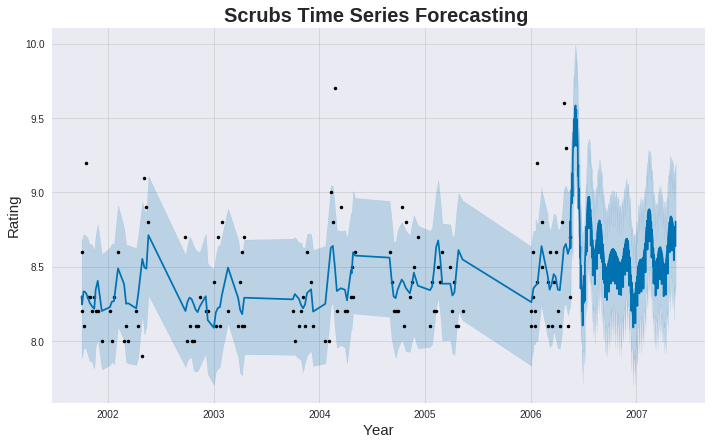

In [0]:
fig1 = model.plot(forecast)
plt.title('Scrubs Time Series Forecasting ',fontsize=20, fontweight='bold')
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Year', fontsize=15)

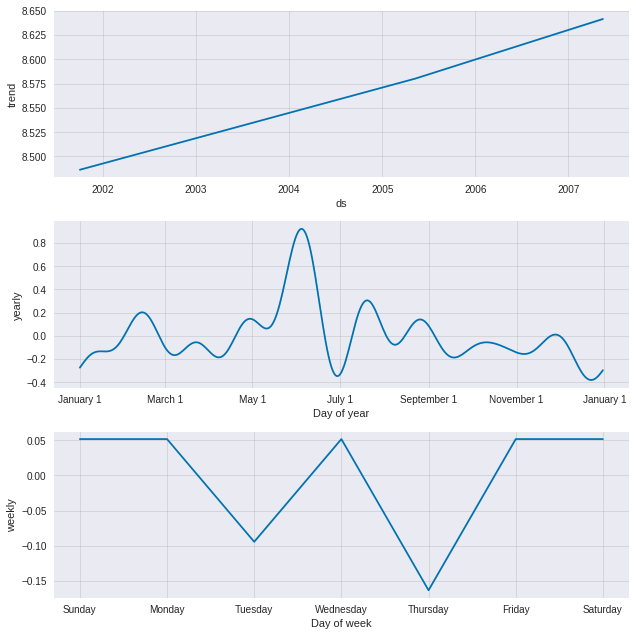

In [0]:
fig2 = model.plot_components(forecast)

Text(0.5,0,u'Episode')

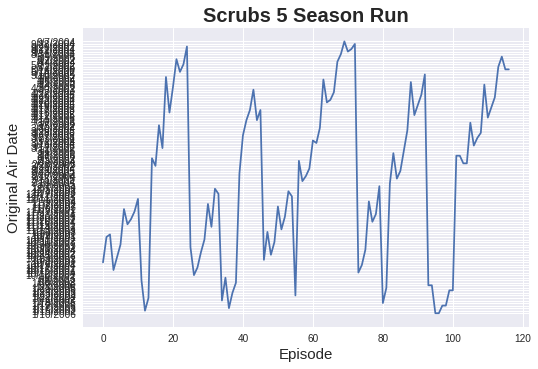

In [0]:
#Checking stationarity of time series
ts = sb['ds']

plt.plot(ts)
plt.title('Scrubs 5 Season Run',fontsize=20, fontweight='bold')
plt.ylabel('Original Air Date', fontsize=15)
plt.xlabel('Episode', fontsize=15) 

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

If a time series has a particular behaviour, there is a very high probability that it will follow the same pattern in the future.

In [0]:
#from statsmodels.tsa.stattools import adfuller
#def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    #orig = plt.plot(timeseries, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    #plt.legend(loc='best')
    #plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    #print 'Results of Dickey-Fuller Test:'
    #dftest = adfuller(timeseries, autolag='AIC')
    #dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    #for key,value in dftest[4].items():
        #dfoutput['Critical Value (%s)'%key] = value
    #print dfoutput

In [0]:
#test_stationarity(ts)

#Forcasting

In [0]:
import sklearn
from sklearn import model_selection


df_x = sb.drop(columns = ['ID', 'Title', 'ds','y', 'Director', 'Writer', 'url'])
df_y = sb['y']

#One Hot Director
dir_one_hot = pd.get_dummies(sb['Director'])
dir_one_hot.columns = dir_one_hot.columns.str.lower()
dir_one_hot.head(1)

#One hot Writer
wir_one_hot = pd.get_dummies(sb['Writer'])
wir_one_hot.columns = wir_one_hot.columns.str.upper()
wir_one_hot.head(1)

# Combines one Hots to Lines Spoken
df_x = df_x.join(dir_one_hot)
df_x = df_x.join(wir_one_hot)


#Seperates Data for training and testing
x_train,x_test,y_train,y_test = model_selection.train_test_split(df_x,df_y,test_size = .3, random_state = 4)

df_x.head(1)

,Turk:,Dr. Cox:,Dr. Kelso:,J.D.:,Elliot:,Janitor:,Carla:,Todd:,Ted:,Nurse Roberts:,...,MATT TARSES,MIKE SCHWARTZ,NEIL GOLDMAN & GARRETT DONOVAN,RICH EUSTIS,RYAN A. LEVIN,TAD QUILL,TIM HOBERT,TIM HOBERT & ERIC WEINBERG,TIM HOBERT & MATT TARSES,WILL BERSON
0,20,42,24,77,19,5,22,5,0,4,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression

In [0]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

param_grid = dict(fit_intercept = ['True', 'False'])


grid_search = GridSearchCV(linear_model.LinearRegression(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best: -0.561073 using {'fit_intercept': 'True'}


Score:  -1.844919815185079
Mean Squared Error:  0.31353387129852234
----------------------------------------------------------------


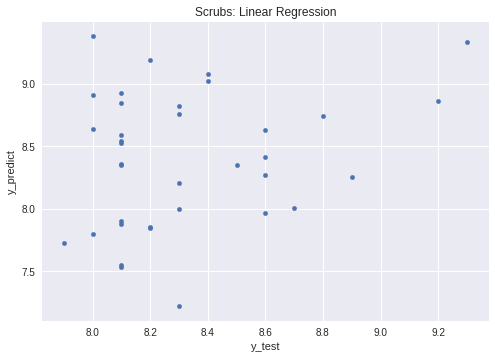

In [0]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Scrubs: Linear Regression')

### K Neighbors

In [0]:
from sklearn import metrics
n_neighbors = range(3,15)
leaf_size = range(25,35)
p=[1,2]

param_grid = dict(n_neighbors=n_neighbors, leaf_size=leaf_size)


grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.271137 using {'n_neighbors': 13, 'leaf_size': 25}


Score:  0.04291898300913721
Mean Squared Error:  0.1054783037475347
----------------------------------------------------------------


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


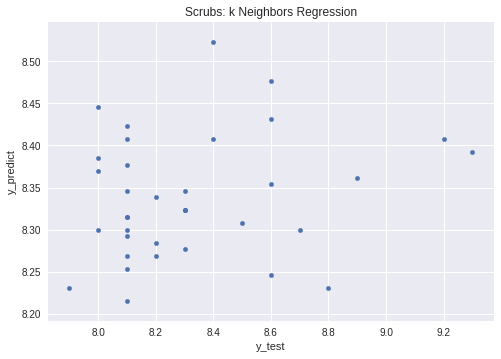

In [0]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=13, leaf_size = 25)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Scrubs: k Neighbors Regression')

### Stochastic Gradient Descent

In [0]:
from sklearn import metrics
import numpy


param_grid = dict(loss = [
    'squared_loss',
    'huber',
    'epsilon_insensitive', 
    'squared_epsilon_insensitive'
], max_iter = numpy.arange(100,2000,50))


grid_search = GridSearchCV(linear_model.SGDRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.935870 using {'loss': 'huber', 'max_iter': 1050}


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Score:  -10.234763159615051
Mean Squared Error:  1.238164523215909
----------------------------------------------------------------


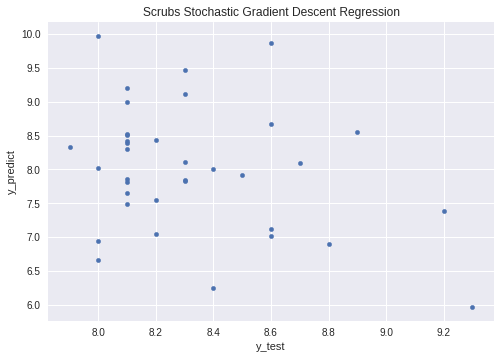

In [0]:
model = linear_model.SGDRegressor(loss = 'huber', max_iter = 1050)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Scrubs Stochastic Gradient Descent Regression')

### Decision Tree

In [0]:
from sklearn import metrics
from sklearn import tree

param_grid = dict(max_depth = range(3,68))


grid_search = GridSearchCV(tree.DecisionTreeRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.273654 using {'max_depth': 15}


Score:  -0.3333333333333337
Mean Squared Error:  0.14694444444444452
-----------------a-----------------------------------------------


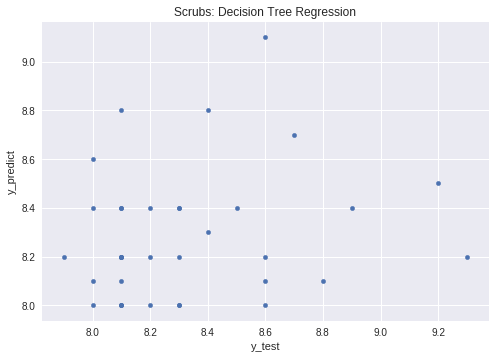

In [0]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 15)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Scrubs: Decision Tree Regression')

### Neural Network

In [0]:
from sklearn import metrics
from sklearn import neural_network
import numpy

param_grid = dict(hidden_layer_sizes = numpy.arange(100, 250, 10),
                 activation = ['identity', 'logistic', 'tanh', 'relu'])


grid_search = GridSearchCV(sklearn.neural_network.MLPRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.280270 using {'activation': 'logistic', 'hidden_layer_sizes': 110}


Score:  -0.24773945213468385
Mean Squared Error:  0.13751128545401
-----------------a-----------------------------------------------


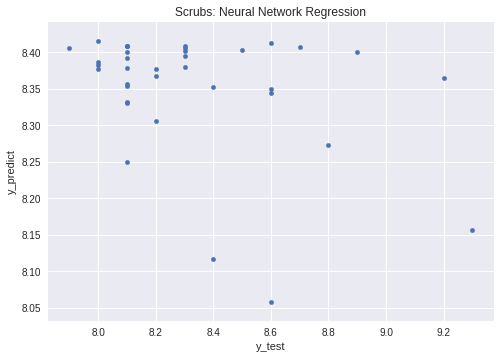

In [0]:
from sklearn import neural_network
model = sklearn.neural_network.MLPRegressor(activation = 'logistic', hidden_layer_sizes = 110)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Scrubs: Neural Network Regression')

### Decision Forest

In [0]:
from sklearn import metrics
from sklearn import ensemble
import numpy

param_grid = dict(n_estimators = numpy.arange(5,30,5), max_depth = numpy.arange(3,68) )


grid_search = GridSearchCV(sklearn.ensemble.RandomForestRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.241026 using {'n_estimators': 5, 'max_depth': 29}


Score:  0.16340264650283598
Mean Squared Error:  0.09219999999999998
----------------------------------------------------------------


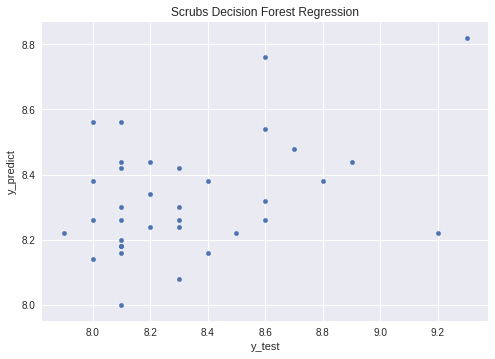

In [0]:
from sklearn import ensemble


model = sklearn.ensemble.RandomForestRegressor(n_estimators = 5, max_depth = 29)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Scrubs Decision Forest Regression')

